<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Тест-алгоритма" data-toc-modified-id="Тест-алгоритма-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Тест алгоритма</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

**Задача:** защитить данные клиентов страховой компании  
Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию

**Импорты**

In [2]:
import pandas as pd
import seaborn as sns
from phik.report import plot_correlation_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

## Загрузка данных

In [3]:
df = pd.read_csv('/datasets/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.head(7)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0


In [5]:
df['Возраст'] = df['Возраст'].astype('int64')

In [6]:
mydups = df.duplicated().sum()
print('Количество полных дубликтов в датасете', mydups)

Количество полных дубликтов в датасете 153


In [7]:
df = df.drop_duplicates()
mydups = df.duplicated().sum()
print('Количество полных дубликтов в датасете', mydups)

Количество полных дубликтов в датасете 0


In [8]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [9]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


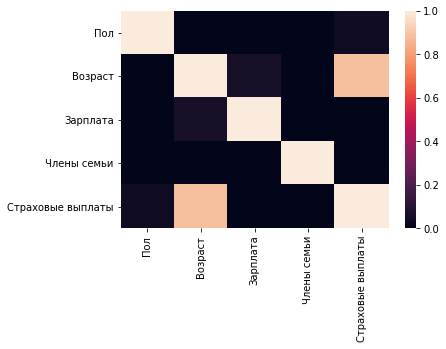

In [10]:
phik_overview = df.phik_matrix()
sns.heatmap(phik_overview)
plt.show()

In [11]:
df.groupby('Пол')['Страховые выплаты'].agg(['count', 'mean'])

,count,mean
Пол,,
0,2431,0.146853
1,2416,0.157699


In [12]:
df.groupby('Возраст')['Страховые выплаты'].agg(['count', 'mean'])

,count,mean
Возраст,,
18,116,0.000000
19,213,0.000000
20,190,0.000000
21,193,0.000000
22,201,0.000000
23,195,0.000000
24,176,0.000000
25,205,0.000000
26,201,0.000000


In [13]:
df.groupby('Члены семьи')['Страховые выплаты'].agg(['count', 'mean']) 

,count,mean
Члены семьи,,
0,1461,0.165640
1,1748,0.164760
2,1038,0.138728
3,437,0.109840
4,124,0.088710
5,32,0.125000
6,7,0.142857


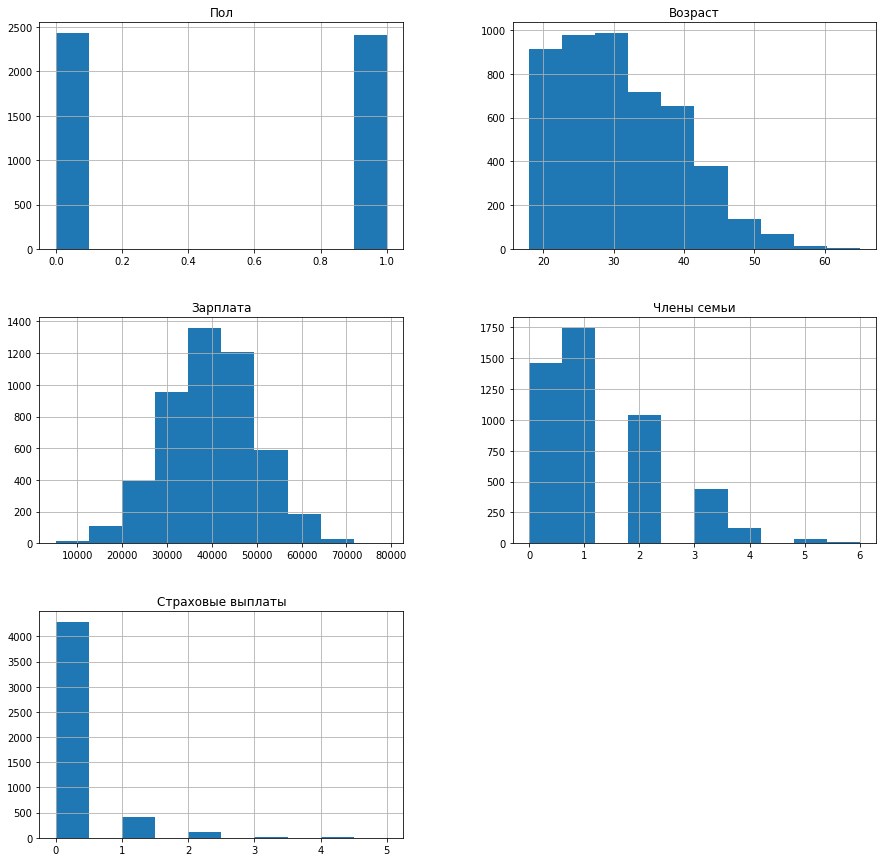

In [14]:
df.hist(figsize=(15,15))
plt.show()

**Дано:** датасет содержащий информацию о поле, возрасте, зарплате застрахованного лица, количестве членов семьи и количестве страховых выплат за последние 5 лет.  
**Датасет** содержит 5 признаков, пропусков нет. Возраст заменили на int64 целочисленный  
**Целевой признак**: количество страховых выплат клиенту за последние 5 лет  
**Признаки** для обучения модели и работы: пол , возраст и зарплата застрахованного, количество членов его семьи  


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ** Качество линейной регресии не измениться после умножения признаков на обратимую матрицу.

Необходимо доказать что предсказания до преобразования равны предсказаниям после преобразования.  
Добавим:

$w1$
 — вектор весов линейной регрессии для $a1$  
$w2$
 — вектор весов линейной регрессии для $a2$  

Доказательство:  
$
X(X^TX)^{−1}X^{T}y1=PX((PX)^{T}(PX))^{−1}PX^{T}y2  
$  
$  
EEy1=EEy2    
$  
$  
y1=y2  
$  
**Вывод** Векторы целевых признаков равны. Если умножить матрицу признаков на случайную матрицу - качество предсказаний не ухудашется, вектора целевых признаков равны

Определим формулу обучения для вектора весов линейной регрессии в случае преобразования и выведем, как связаны $w′$
 и $w$
, как связаны $a′$
 и $a$
 Представим новую матрицу $X′$
 как произведение начальной матрицы $X$
 на случайную обратимую $PX′=XP$
 тогда:
 
 $$
 w′=((PX)^{T}(PX))^{−1}(PX)^{T}y=(P^{T}X^{T}PX)^{−1}P^{T}X^{T}y=P^{−1}(X^{T}X)^{−1}(PT)−1P^{T}X{T}y=P^{−1}(X^{T}X)^{−1}EX^{T}y=P^{−1}(X^{T}X)^{−1}X^{T} y
 $$
 
Согласно условиям:
$
w = (X^T X)^{-1} X^Ty
$  
Следовательно:
$w′=P^{−1}w$  

Подставим в формулу линейной регресии и определим $a'$:  
$a′=X′w′=XPP^{−1}w=XEw=Xw=a$

**Вывод** предсказания $a′$ для матрицы признаков, умноженных на обратимую матрицу P
 равны предсказаниям $a$. Качество линейной регрессии не изменится.

## Алгоритм преобразования

**Алгоритм**

1. Деление выборки на фичи и таргеты.
2. Создание случайной матрицы с 4 признаками.
3. Умножение случайно матрицы на константное значение.
4. Обучение модели на новых признаках.Получение предсказаний.
5. Обучение модели на исходных признаках.Получение предсказаний.
6. Сравнение значений двух метрик.

**Обоснование**

In [15]:
def split_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]

features, target = split_data(df,'Страховые выплаты')
features.shape, target.shape

((4847, 4), (4847,))

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(features, target)
predict = lin_reg.predict(features)
r2 = r2_score (target, predict)

In [17]:
rnd_matrix = np.random.rand(4,4)
np.linalg.inv(rnd_matrix)
new_features = features @ rnd_matrix

In [18]:
lin_reg_rnd = LinearRegression()
lin_reg_rnd.fit(new_features, target)
predict_rnd = lin_reg_rnd.predict(new_features)
r2_rnd = r2_score (target, predict_rnd)

In [19]:
print(f'Кф детерминации исходный: {r2}')
print(f'Кф детерминации преобразованный: {r2_rnd}')

Кф детерминации исходный: 0.4302010044852066
Кф детерминации преобразованный: 0.4302010044852266


Коэффициенты детерминации практически идентичны. Преобразование не повлияло на качество линейной регерссии.

### Тест алгоритма

In [20]:
class MatrixFix():
    def __init__(self, fix = True):
        self.fix = fix
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, matrix, y=None):
        matrix_rnd = np.random.rand(4,4) * 1589
        X_new = X @ matrix_rnd
        if matrix == True:
            return X_new, matrix_rnd
        else:
            return X_new

In [21]:
adder = MatrixFix(fix=True)
new_features, matrix  = adder.transform(features, matrix=True)
matrix

array([[ 357.42822715,  806.23081072,  553.69647061, 1395.23337677],
       [ 173.72378923, 1116.08076354,  880.68811909,  601.36611549],
       [ 450.546766  , 1395.57699958, 1123.99243292, 1036.78115113],
       [  41.96406628,  750.53529755, 1337.53259504, 1280.8683818 ]])

In [22]:
new_features 

,0,1,2,3
0,2.235464e+07,6.926794e+07,5.578802e+07,5.145168e+07
1,1.712881e+07,5.308402e+07,4.275356e+07,3.942663e+07
2,9.466520e+06,2.933948e+07,2.362938e+07,2.178984e+07
3,1.879153e+07,5.822050e+07,4.689165e+07,4.324896e+07
4,1.176449e+07,3.645662e+07,2.936142e+07,2.707822e+07
...,...,...,...,...
4995,1.608947e+07,4.985485e+07,4.015386e+07,3.703249e+07
4996,2.361460e+07,7.316693e+07,5.892848e+07,5.434906e+07
4997,1.527709e+07,4.733388e+07,3.812363e+07,3.516147e+07
4998,1.473718e+07,4.566298e+07,3.677849e+07,3.392121e+07


In [23]:
lin_reg = LinearRegression()
lin_reg.fit(features, target)
predict = lin_reg.predict(features)
r_2_1 = r2_score (target, predict)
print(f'Кф детерминации: {r_2_1}')

Кф детерминации: 0.4302010044852066


In [24]:
adder = MatrixFix(fix=True)
features_tr, matrix_1  = adder.transform(features, matrix=True)
features_tr.head()

,0,1,2,3
0,2.781372e+07,5.925365e+07,4.169183e+07,5.558968e+06
1,2.132024e+07,4.541104e+07,3.194539e+07,4.265266e+06
2,1.178483e+07,2.509861e+07,1.765507e+07,2.358608e+06
3,2.337279e+07,4.980266e+07,3.504617e+07,4.666824e+06
4,1.464113e+07,3.118634e+07,2.194124e+07,2.928478e+06


In [25]:
X_train_tr, X_test_tr, y_train, y_test = (train_test_split(features_tr, target, test_size = 0.25, random_state = 15))

In [26]:
print('Количество обучающей выборки:', len(X_train_tr))
print('Количество валидационной выборки:', len(X_test_tr))
print('Сумма выборок:', len(X_train_tr) + len(X_test_tr))
print('Количество образцов всей выборки:', len(features_tr))      

Количество обучающей выборки: 3635
Количество валидационной выборки: 1212
Сумма выборок: 4847
Количество образцов всей выборки: 4847


In [27]:
model_tr = LinearRegression()
model_tr.fit(X_train_tr, y_train)
y_pred_tr = model_tr.predict(X_test_tr)
r2_tr = r2_score(y_test, y_pred_tr)

In [28]:
X_train, X_test, y_train, y_test = (train_test_split(features, target, test_size = 0.25, random_state = 15))

In [29]:
print('Количество обучающей выборки:', len(X_train))
print('Количество  валидационной выборки:', len(X_test))
print('Сумма выборок:', len(X_train) + len(X_test))
print('Количество образцов всей выборки:', len(features))      

Количество обучающей выборки: 3635
Количество  валидационной выборки: 1212
Сумма выборок: 4847
Количество образцов всей выборки: 4847


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_pred = r2_score(y_test, y_pred)

In [31]:
print(f'Кф детерминации исходник: {r2_pred}')
print(f'Кф детерминации преобразованный: {r2_tr}')

Кф детерминации исходник: 0.4284638133971589
Кф детерминации преобразованный: 0.42846381339712125


Коэффициенты детерминации практически идентичны. Качество линейной регрессии осталось на том же уровне.

## Вывод

**Задача:** защита данных клиентов

**Решение**:
1. Разработка алгоритма преобразования
2. Преобразование
3. Проверка качества линейной регресиии на преоборазованных и не преобразованных данных.

**Итог**:  
предложеный алгоритм реобразования не влияет на качество линейной регресиии. Алгоритм получения случайно матрицы для шифрования клиентских данных может быть примененен без потери качества модели машинного обучения.
